In [5]:
import pandas as pd

In [6]:
CUSTOMER_DATA = '../data/customer_data.csv'
SALES_DETAIL = '../data/sales_detail.csv'
SALES_SUMMARY = '../data/sales_summary.csv'

In [7]:
df_cust = pd.read_csv(CUSTOMER_DATA)
df_cust.head()

customer_id  gender  birth_year
0       529349  female      1971.0
1       529613    male      1989.0
2       529793    male      1963.0
3       529828    male      1989.0
4       529877    male      1994.0

In [8]:
df_cat_top = pd.read_csv(SALES_DETAIL)
df_cat_top.head()

customer_id  Year  Month catagory_code  total_spent_for_category  \
0       682845  2019      4          B119                   20620.0   
1       745995  2018      3          B113                   45415.0   
2       559677  2018      2          B118                  165115.0   
3       723909  2018     11          B113                  124656.4   
4       641257  2019      7          B118                   39430.0   

     end_date  
0  2019/04/30  
1  2018/03/31  
2  2018/02/28  
3  2018/11/30  
4  2019/07/31

In [9]:
df_sales = pd.read_csv(SALES_SUMMARY)
df_sales.head()

customer_id  year  month  weekend_amount_spent  Num_of_weekend_visits  \
0       595394  2019     12                190.30                      1   
1       551439  2019      6               7964.50                      2   
2       605002  2019      9               5381.95                      1   
3       581286  2019      6               5510.50                      2   
4       565302  2019     11                100.00                      0   

   total_amount_spent  total_num_of_visits    end_date  
0             3359.35                   10  2019/12/31  
1            12155.50                    3  2019/06/30  
2            12538.65                    6  2019/09/30  
3            23052.43                    4  2019/06/30  
4             2905.00                    1  2019/11/30

## Null values

In [11]:
print(df_cust.count())
print(df_cat_top.count())
print(df_sales.count())

customer_id    2000
gender         1915
birth_year     1903
dtype: int64
customer_id                 179197
Year                        179197
Month                       179197
catagory_code               179197
total_spent_for_category    179197
end_date                    179197
dtype: int64
customer_id              32752
year                     32752
month                    32752
weekend_amount_spent     32752
Num_of_weekend_visits    32752
total_amount_spent       32752
total_num_of_visits      32752
end_date                 32752
dtype: int64


A few null values in the gender and birth year columns

## Row counts

In [13]:
print(df_cust.shape)
print(df_sales.shape)
print(df_cat_top.shape)

(2000, 3)
(32752, 8)
(179197, 6)


In [16]:
cust_set = set(df_cust.customer_id.unique())
cust_set_cat_top = set(df_cat_top.customer_id.unique())
cust_set_sales = set(df_sales.customer_id.unique())
print(cust_set - cust_set_cat_top)
print(cust_set - cust_set_sales)

{700547, 622856, 566410, 597779, 601364, 615573, 683032, 628121, 749596, 619184, 576820, 625717, 548406, 723513, 565817, 550460, 567617, 650177, 606667, 578773, 595033, 587111, 568936, 721777, 754425, 711158, 597621, 740729, 726779, 674044, 605823}
set()


2000 customers in customer details. <br>
Some customers have not purchased items from the top 20 categories <br>
All customers  have a sales history

In [19]:
df_sales.groupby(['year', 'month']).count()

customer_id  weekend_amount_spent  Num_of_weekend_visits  \
year month                                                             
2017 1              938                   938                    938   
     2              950                   950                    950   
     3              996                   996                    996   
     4             1035                  1035                   1035   
     5              991                   991                    991   
     6              911                   911                    911   
     7              916                   916                    916   
     8              895                   895                    895   
     9              896                   896                    896   
     10             881                   881                    881   
     11             851                   851                    851   
     12             937                   937                    937   
2018 1              886                   886                    886   
     2              864                   864                    864   
     3              918                   918                    918   
     4              937                   937                    937   
     5              903                   903                    903   
     6              888                   888                    888   
     7              884                   884                    884   
     8              854                   854                    854   
     9              923                   923                    923   
     10             883                   883                    883   
     11             906                   906                    906   
     12             974                   974                    974   
2019 1              925                   925                    925   
     2              879                   879                    879   
     3              926                   926                    926   
     4              948                   948                    948   
     5              894                   894                    894   
     6              884                   884                    884   
     7              883                   883                    883   
     8              879                   879                    879   
     9              826                   826                    826   
     10             880                   880                    880   
     11             860                   860                    860   
     12             951                   951                    951   

            total_amount_spent  total_num_of_visits  end_date  
year month                                                     
2017 1                     938                  938       938  
     2                     950                  950       950  
     3                     996                  996       996  
     4                    1035                 1035      1035  
     5                     991                  991       991  
     6                     911                  911       911  
     7                     916                  916       916  
     8                     895                  895       895  
     9                     896                  896       896  
     10                    881                  881       881  
     11                    851                  851       851  
     12                    937                  937       937  
2018 1                     886                  886       886  
     2                     864                  864       864  
     3                     918                  918       918  
     4                     937                  937       937  
     5                     903                  903       903  
     6                     888                  888       8

Sales history has data from the past 3 years for all months

## Distributions of data

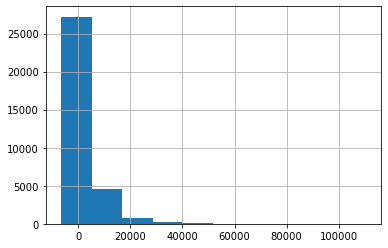

In [20]:
df_sales.weekend_amount_spent.hist()

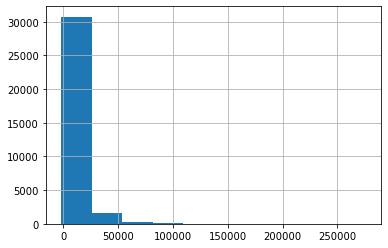

In [22]:
df_sales.total_amount_spent.hist()

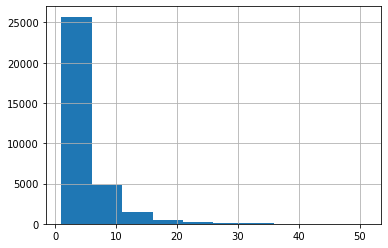

In [25]:
df_sales.total_num_of_visits.hist()

In [26]:
df_cust.gender.value_counts()

male      1269
female     646
Name: gender, dtype: int64

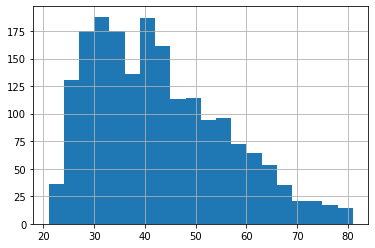

In [33]:
(2020 - df_cust.birth_year).hist(bins=20) #age histogram

In [30]:
df_sales.customer_id.nunique()

1969

In [14]:
df_summary.customer_id.nunique()

2000

In [15]:
df_summary.shape

(32752, 8)